# Proyek Analisis Data: E-Commerce Public Data Analysis Project
- **Nama:** G-MOOC 4D
- **Email:** gmooc4dteam@gmail.com
- **ID Dicoding:** gmooc4d_team

## Menentukan Pertanyaan Bisnis

- Bagaimana tren waktu pada order purchase?
- Bagaimana persebaran wilayah pembeli?
- Apa saja 10 produk paling banyak dan paling sedikit terjual?
- Bagaimana kualitas produk berdasarkan rata-rata rating score?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg
from scipy import stats
from datetime import date

## Data Wrangling

### Gathering Data

In [5]:
# dict dataset yang akan digunakan
dict_dataset = {'cust':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/customers_dataset.csv',
                'geo':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/geolocation_dataset.csv',
                'order_items':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/order_items_dataset.csv',
                'order_payments':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/order_payments_dataset.csv',
                'order_reviews':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/order_reviews_dataset.csv',
                'orders':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/orders_dataset.csv',
                'product_category_translate':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/product_category_name_translation.csv',
                'products':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/products_dataset.csv',
                'sellers':'https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/sellers_dataset.csv'}

In [6]:
dict_df = {}
for key, value in dict_dataset.items():
  df = pd.read_csv(value)
  dict_df[key] = df

In [7]:
dict_df['cust']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [8]:
dict_df['geo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.62,sao paulo,SP
1,1046,-23.55,-46.66,sao paulo,SP
2,1046,-23.55,-46.66,sao paulo,SP
3,1041,-23.55,-46.62,sao paulo,SP
4,1035,-23.55,-46.66,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.06,-52.00,tapejara,RS
1000159,99900,-27.88,-52.22,getulio vargas,RS
1000160,99950,-28.08,-52.00,tapejara,RS
1000161,99980,-28.39,-51.84,david canabarro,RS


In [9]:
dict_df['order_items']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
dict_df['order_payments']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
dict_df['order_reviews']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
dict_df['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
dict_df['product_category_translate']

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
dict_df['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
dict_df['sellers']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Assessing Data

#### Info Data

In [ ]:
for key, value in dict_df.items():
  print(f'Dataset {key}:')
  print(value.info())
  print('==============================================================')

Dataset cust:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Dataset geo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_cit

Terdapat beberapa missing type, yaitu data waktu seharusnya 'date' tetapi tercantum object. Lakukan perubahan tipe data pada data waktu

In [ ]:
# Inisiasi data waktu yang akan diubah
data_waktu = {'order_items':'shipping_limit_date',
              'order_reviews':['review_creation_date','review_answer_timestamp'],
              'orders':['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']}

data_waktu

{'order_items': 'shipping_limit_date',
 'order_reviews': ['review_creation_date', 'review_answer_timestamp'],
 'orders': ['order_purchase_timestamp',
  'order_approved_at',
  'order_delivered_carrier_date',
  'order_delivered_customer_date',
  'order_estimated_delivery_date']}

In [ ]:
for key, values in data_waktu.items():
  for value in values:
    dict_df[key][values]= dict_df[key][values].apply(pd.to_datetime)

  # cek info data terbaru
  print(dict_df[key].info())
  print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  objec

#### Cek Data Duplikat

In [ ]:
for key, value in dict_df.items():
  print(f'Dataset {key} = {dict_df[key].duplicated().sum()}')

Dataset cust = 0
Dataset geo = 261831
Dataset order_items = 0
Dataset order_payments = 0
Dataset order_reviews = 0
Dataset orders = 0
Dataset product_category_translate = 0
Dataset products = 0
Dataset sellers = 0


#### Cek Missing Value

In [ ]:
for key, value in dict_df.items():
  missing_val = pd.DataFrame(dict_df[key].isna().sum(), columns=['missing'])
  missing_val['total'] = dict_df[key].shape[0]
  missing_val['persentase_nan(%)'] = (missing_val['missing'] / missing_val['total']) * 100
  print(key,': \n', missing_val)
  print()

cust : 
                           missing  total  persentase_nan(%)
customer_id                     0  99441                0.0
customer_unique_id              0  99441                0.0
customer_zip_code_prefix        0  99441                0.0
customer_city                   0  99441                0.0
customer_state                  0  99441                0.0

geo : 
                              missing    total  persentase_nan(%)
geolocation_zip_code_prefix        0  1000163                0.0
geolocation_lat                    0  1000163                0.0
geolocation_lng                    0  1000163                0.0
geolocation_city                   0  1000163                0.0
geolocation_state                  0  1000163                0.0

order_items : 
                      missing   total  persentase_nan(%)
order_id                   0  112650                0.0
order_item_id              0  112650                0.0
product_id                 0  112650           

### Cleaning Data

#### Handling Cust Data

In [ ]:
dict_df['cust'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
70926,892a57422d5ac192f783945dd2aadaeb,37e17edc107a2e3feecf9514f555b5c3,75903,rio verde,GO
50824,58aee0d0dfbc927800d152c34dc5e530,92bb9040e87e4ca6ab28b3f558943488,22231,rio de janeiro,RJ
8837,16fdfe3c4f948f802baee3f32d1f99fe,beb6f9fd570947c43749a143f370ebe4,14093,ribeirao preto,SP
62835,090b074313d5a866233fccf2039e8b93,81ae889ff96950c263ccb0e049609a3c,84196,colonia castrolanda,PR
86605,2af7da42a03f0b164992f335a100ab18,e35b2a3c980b6e0fc66c66b8e1122e93,14406,franca,SP


Hapus customer city dan customer_state, karena sudah diwakilkan oleh zip code

In [ ]:
# ubah nama kolom customer_zip_code_prefix
dict_df['cust'].rename(columns={'customer_zip_code_prefix': 'zip_code'}, inplace=True)

In [ ]:
dict_df['cust'].sample(5)

,customer_id,customer_unique_id,zip_code,customer_city,customer_state
91461,4ceb21edf64c0b960eafca68dab32de0,9b1d34d16dab9716505efa1e87a48e5d,4210,sao paulo,SP
47132,2df3cd2a5c57feeccf98a9eaaf01cc13,f5dd53e8bde8dab0eda335bcdc5c51ff,13097,campinas,SP
57528,e6e8c45cc168c62a5fc3b17fc0f7b8df,c1c6d18cde33de92ff2bf10f93fae292,60135,fortaleza,CE
83195,5cfe32da5d3a6c6cc7c169d74da8e100,ed31f1abb1f62d32ba7e02f6aae16ed9,20270,rio de janeiro,RJ
20377,1db08c206aef92f4f7727a98db210397,b9ddbf8c1add8d434d625d6bf3413e42,7092,guarulhos,SP


#### Handling Products

In [ ]:
dict_df['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
# Membuat kamus mapping
category_mapping = dict(zip(dict_df['product_category_translate']['product_category_name'], dict_df['product_category_translate']['product_category_name_english']))
category_mapping

{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

In [ ]:
# Menggantikan nilai pada kolom product_category_name
dict_df['products']['product_category_name'] = dict_df['products']['product_category_name'].map(category_mapping)
dict_df['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### Handling Geo

In [ ]:
dict_df['geo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
# ubah kolom geolocation_zip_code_prefix menjadi zip_code_prefix
dict_df['geo'].rename(columns={'geolocation_zip_code_prefix': 'zip_code'}, inplace=True)

In [ ]:
# cek duplikasi data geolocation_zip_code_prefix
dict_df['geo']['zip_code'].duplicated().sum()

981148

In [ ]:
# Hapus data yang duplikat berdasarkan kolom 'zip_code'
dict_df['geo'].drop_duplicates(subset='zip_code', keep='first', inplace=True)
dict_df['geo']

,zip_code,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


#### Handling Order Items

In [ ]:
dict_df['order_items']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# data order_items
dict_df['order_items']['order_id'].duplicated().sum()

duplicates = dict_df['order_items'][dict_df['order_items']['order_id'].duplicated(keep=False)].sort_values(by='order_id')
duplicates


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
...,...,...,...,...,...,...,...
112634,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


Pada dataset order_items terdapat 23787 data yang memiliki duplikat pada atribut order_id.
Setelah dianalisis duplikat terjadi karena perbedaan order_item_id pada setiap order_id yang duplikat. Akan dilakukan penghapusan duplikat dan akan mempertahankan data dengan order_item_id tertinggi

In [ ]:
# Menghapus data duplikat berdasarkan kolom 'order_id'
dict_df['order_items'].drop_duplicates(subset='order_id', keep='last', inplace=True)

dict_df['order_items']['order_id'].duplicated().sum()

0

#### Handling order_reviews missing value

In [ ]:
dict_df['order_reviews'].sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
89936,854f7806b3277ceddfd447b75fb503ec,aa65d58f7ec283d50195563c69c9d6da,4,Muito bom,Produto muito bom,2018-05-10,2018-05-11 22:18:54
91402,6f9582b12fe00f91f653e0f5e7014d59,7b552795a31c3247f5e0d3bc02addcfe,5,NaN,NaN,2017-08-26,2017-08-29 02:41:03
49151,cbf99350a49e9acddd0dafe71fb134de,89844d8832c881326923a2cf804b72cd,5,NaN,NaN,2018-06-06,2018-06-11 16:28:57
18545,029d8158d19416f14116635a8e6ce022,58fcb8ce8784213ace394e1427f50fb7,1,NaN,NaN,2018-07-13,2018-07-14 00:58:35
21310,7cc12644180967b891c6e3811074d4fe,1b83b0cc5c4f25371dc567405ff773c1,3,NaN,NaN,2018-06-21,2018-06-23 19:59:36


Pada data review 'title' tidak terlalu berpengaruh, karena yang kita ingin tahu hanya rating dan komennya saja.

Maka title akan dihapus serta komen dengan NaN akan dijadikan tidak komen dan yang berkomentar dijadikan komen.

Menghapus kolom review creation dan review answer date

In [ ]:
# Membuat kolom baru 'comment_status' berdasarkan kondisi pada kolom 'comment'
dict_df['order_reviews']['comment_status'] = dict_df['order_reviews']['review_comment_message'].apply(lambda x: 'No' if pd.isna(x) else 'Yes')
dict_df['order_reviews'].sample(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,comment_status
20373,cd471cfd5bee02d75eba615948ab5e09,d7c70fb2bee123c2d2e46338c1b35f1c,5,NaN,"adorei comprei dois peneis do carro, ficou tud...",2017-09-20,2017-09-21 16:18:21,Yes
41641,edf7d5643e0c32d6481a6e23238a626e,a87d8e4358ec8697c2eb5dbcc42f8330,5,NaN,NaN,2018-08-08,2018-08-10 17:12:08,No
23695,fbc05d6f2c16fca69219c02d3b41538b,3410526e055530279c894ab7542c827f,5,NaN,NaN,2018-08-24,2018-08-27 13:03:22,No


In [ ]:
# drop kolom title, komen, dan tanggal interaksi komen
dict_df['order_reviews'] = dict_df['order_reviews'].drop(['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], axis=1)
dict_df['order_reviews'].sample(3)

,review_id,order_id,review_score,comment_status
83265,4931be455ef37217285d29aa2c6bf20d,21d032917e4ed1476f16ce92d0d8fdd4,4,No
92570,48635a2309c53c26a875c9417d4916aa,94c753ff371f05e68a157809f9cda46d,1,Yes
26061,dc4a9ce0e06d55bef0a95fe83f36876e,4b16b807a377f833778fc8b96f6d9ac4,5,Yes


#### Handling Orders missing value

Karena pada dataset order ini merupakan proses order barang, approve order, dan proses pengiriman maka dibutuhkan data seller terkait nama dan lokasi serta lokasi pembeli

In [ ]:
dict_df['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


Merge dataset orders dengan order_items, sellers dan customers

In [ ]:
# Menggabungkan orders dengan order_items untuk mendapatkan informasi seller
merged_orders_items = pd.merge(dict_df['orders'], dict_df['order_items'], on='order_id', how='left')
# Menggabungkan hasilnya dengan sellers untuk mendapatkan informasi seller
merged_orders_items_sellers = pd.merge(merged_orders_items, dict_df['sellers'], on='seller_id', how='left')
# Menggabungkan hasilnya dengan customers untuk mendapatkan informasi customer
merged_orders_items_sellers_customers = pd.merge(merged_orders_items_sellers, dict_df['cust'], on='customer_id', how='left')
# # Menggabungkan hasilnya dengan geo untuk mendapatkan informasi kota customer
# final_merged_df = pd.merge(merged_orders_items_sellers_customers, dict_df['geo'],
#                           left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

merged_orders_items_sellers_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-11-23 19:45:59,45.00,27.20,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-19 20:31:37,19.90,8.72,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,ac35486adb7b02598c182c2ff2e05254,...,2017-03-15 09:54:05,72.00,13.08,12913.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,2018-02-12 13:10:37,174.90,20.10,17602.0,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,2017-09-05 15:04:16,205.99,65.02,8290.0,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-01-12 21:36:21,179.99,40.59,37175.0,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


Memilih kolom/fitur yang akan digunakan saja

In [ ]:
# Memilih hanya kolom yang diperlukan
dict_df['orders'] = merged_orders_items_sellers_customers

# Menampilkan DataFrame hasil
dict_df['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-11-23 19:45:59,45.00,27.20,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-19 20:31:37,19.90,8.72,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,ac35486adb7b02598c182c2ff2e05254,...,2017-03-15 09:54:05,72.00,13.08,12913.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,2018-02-12 13:10:37,174.90,20.10,17602.0,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,2017-09-05 15:04:16,205.99,65.02,8290.0,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-01-12 21:36:21,179.99,40.59,37175.0,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


Menghitung selisih waktu antara order_purchase_timestamp dan order_approved_at

In [ ]:
# Hitung selisih waktu antara order_purchase_timestamp dan order_approved_at
dict_df['orders']['time_approve'] = dict_df['orders']['order_approved_at'] - dict_df['orders']['order_purchase_timestamp']

# Tampilkan DataFrame dengan kolom baru
dict_df['orders'][['order_id', 'order_purchase_timestamp', 'order_approved_at', 'time_approve']]

,order_id,order_purchase_timestamp,order_approved_at,time_approve
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,0 days 00:10:42
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,1 days 06:42:50
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,0 days 00:16:34
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,0 days 00:17:53
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,0 days 01:01:50
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-09 09:54:05,0 days 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-06 13:10:37,0 days 00:11:39
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-08-27 15:04:16,0 days 00:17:33
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-08 21:36:21,0 days 00:07:54


Menghitung selisih waktu antara order_approved_at dan order_delivered_carrier_date

In [ ]:
# Hitung selisih waktu antara order_approved_at dan order_delivered_carrier_date
dict_df['orders']['time_delivered_carrier'] = dict_df['orders']['order_delivered_carrier_date'] - dict_df['orders']['order_approved_at']

# Tampilkan DataFrame dengan kolom baru
dict_df['orders'][['order_id', 'order_approved_at', 'order_delivered_carrier_date', 'time_delivered_carrier']]

,order_id,order_approved_at,order_delivered_carrier_date,time_delivered_carrier
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10-04 19:55:00,2 days 08:47:45
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-07-26 14:31:00,0 days 11:06:33
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08-08 13:50:00,0 days 04:54:37
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-11-22 13:39:59,3 days 17:54:00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02-14 19:46:34,0 days 21:26:05
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-10 11:18:03,1 days 01:23:58
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,2018-02-07 23:22:42,1 days 10:12:05
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,2017-08-28 20:52:26,1 days 05:48:10
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,2018-01-12 15:35:03,3 days 17:58:42


Menghitung selisih waktu antara order_delivered_carrier_date dan order_delivered_customer_date

In [ ]:
# Hitung selisih waktu antara order_delivered_carrier_date dan order_delivered_customer_date
dict_df['orders']['time_delivered_customer'] = dict_df['orders']['order_delivered_customer_date'] - dict_df['orders']['order_delivered_carrier_date']

# Tampilkan DataFrame dengan kolom baru
dict_df['orders'][['order_id', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'time_delivered_customer']]

,order_id,order_delivered_carrier_date,order_delivered_customer_date,time_delivered_customer
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 14:31:00,2018-08-07 15:27:45,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 13:50:00,2018-08-17 18:06:29,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-22 13:39:59,2017-12-02 00:28:42,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-14 19:46:34,2018-02-16 18:17:02,1 days 22:30:28
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-10 11:18:03,2017-03-17 15:08:01,7 days 03:49:58
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-07 23:22:42,2018-02-28 17:37:56,20 days 18:15:14
99438,83c1379a015df1e13d02aae0204711ab,2017-08-28 20:52:26,2017-09-21 11:24:17,23 days 14:31:51
99439,11c177c8e97725db2631073c19f07b62,2018-01-12 15:35:03,2018-01-25 23:32:54,13 days 07:57:51


In [ ]:
# dict_df final
dict_df['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0 days 00:16:34,0 days 04:54:37,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,ac35486adb7b02598c182c2ff2e05254,...,12913.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0 days 00:00:00,1 days 01:23:58,7 days 03:49:58
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,17602.0,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0 days 00:11:39,1 days 10:12:05,20 days 18:15:14
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,8290.0,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,0 days 00:17:33,1 days 05:48:10,23 days 14:31:51
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,37175.0,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,0 days 00:07:54,3 days 17:58:42,13 days 07:57:51


Mengisi order_approved dengan waktu rata-rata approved masing masing seller, sebelum nya cek karakteristik data berdasarkan order_status

In [ ]:
dict_df['orders']['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
# Menampilkan data dengan order_id tertentu
specific_order = dict_df['orders'].loc[dict_df['orders']['order_status'] == 'invoiced']
specific_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,...,5455.0,sao paulo,SP,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2 days 01:03:09,NaT,NaT
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,1.0,1522589c64efd46731d3522568e5bc83,...,3644.0,sao paulo,SP,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,3 days 12:30:32,NaT,NaT
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28,1.0,8988d11aace15e3c9e25763c6d87dcf5,...,3872.0,sao paulo,SP,9a58c55c10b4eb6c69fb0874d8beb466,23025,rio de janeiro,RJ,0 days 00:14:49,NaT,NaT


In [ ]:
# Menampilkan data dengan order_id tertentu
specific_order = dict_df['orders'].loc[dict_df['orders']['order_status'] == 'processing']
specific_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,1.0,61d52f4882421048afd530db53d6f230,...,19023.0,presidente prudente,SP,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,0 days 00:08:06,NaT,NaT
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,1.0,ca17b18b38db6e0d2c33d362322f2a06,...,69900.0,rio branco,AC,07d5b1f9bdd053347f0213187b343ac9,3531,sao paulo,SP,0 days 17:06:52,NaT,NaT
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20,1.0,73a6530caef9511c04711d12dcef551c,...,13660.0,portoferreira,SP,2adaff8e437d7153f3326cf14187d821,6519,santana de parnaiba,SP,0 days 03:05:42,NaT,NaT


In [ ]:
# Menampilkan data dengan order_id tertentu
specific_order = dict_df['orders'].loc[dict_df['orders']['order_status'] == 'approved']
specific_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01,2.0,dcecb611ba878d5d8c7853585b285c12,...,37795.0,andradas,MG,7b9d52d22310baecad0f9df64872208d,35590,lagoa da prata,MG,0 days 00:12:02,NaT,NaT
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22,1.0,c4a1c4638fa9e2e4861d141d6e0259e7,...,2051.0,sao pauo,SP,6a068ccd3a149b5c8ceb4e04c83feb8a,8255,sao paulo,SP,5 days 19:07:07,NaT,NaT


Ditemukan 3 order_status dengan karakter yang sama, ketiga order_status tersebut akan disamakan dan diubah statusnya menjadi approved

In [ ]:
# Mengubah nilai 'pending' dan 'processing' menjadi 'approved'
conditions = (dict_df['orders']['order_status'] == 'invoiced') | (dict_df['orders']['order_status'] == 'processing')
dict_df['orders'].loc[conditions, 'order_status'] = 'approved'

dict_df['orders']['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
approved         617
unavailable      609
created            5
Name: order_status, dtype: int64

In [ ]:
dict_df['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0 days 00:16:34,0 days 04:54:37,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,ac35486adb7b02598c182c2ff2e05254,...,12913.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0 days 00:00:00,1 days 01:23:58,7 days 03:49:58
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,17602.0,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0 days 00:11:39,1 days 10:12:05,20 days 18:15:14
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,8290.0,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,0 days 00:17:33,1 days 05:48:10,23 days 14:31:51
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,37175.0,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,0 days 00:07:54,3 days 17:58:42,13 days 07:57:51


In [ ]:
# Menampilkan data null pada kolom order_approved_at dengan pengecualian pada order status "cancelled" dan "unavailable"
filtered_df = dict_df['orders'][(dict_df['orders']['order_delivered_customer_date'].isnull()) & (~dict_df['orders']['order_status'].isin(['canceled', 'unavailable']))]
filtered_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,approved,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,...,5455.0,sao paulo,SP,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2 days 01:03:09,NaT,NaT
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1.0,c50ca07e9e4db9ea5011f06802c0aea0,...,11701.0,praia grande,SP,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,0 days 11:46:30,0 days 10:00:42,NaT
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,approved,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,1.0,1522589c64efd46731d3522568e5bc83,...,3644.0,sao paulo,SP,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,3 days 12:30:32,NaT,NaT
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,approved,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,1.0,61d52f4882421048afd530db53d6f230,...,19023.0,presidente prudente,SP,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,0 days 00:08:06,NaT,NaT
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,...,9015.0,santo andre,SP,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG,0 days 14:59:23,0 days 17:06:53,NaT


Membuat kamus rata-rata pada 3 kolom yang akan di fillna

In [ ]:
dict_df['orders'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99281 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96476 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   order_item_id                  98666 non-null  float64        
 9   product_id                     98666 non-null  object         
 10  seller_id                      98666 non-null  object         
 11  sh

In [ ]:
# Mendapatkan rata-rata time_approve untuk setiap seller_id
avg_approve_time = dict_df['orders'].groupby('seller_id')['time_approve'].mean().to_dict()
# Mendapatkan rata-rata time_delivered_carrier untuk setiap seller_id
avg_delivered_carrier_time = dict_df['orders'].groupby('seller_id')['time_delivered_carrier'].mean().to_dict()
# Mendapatkan rata-rata order_delivered_customer_date untuk setiap seller_city dan customer_city
avg_delivered_customer_time = dict_df['orders'].groupby(['seller_city', 'customer_city'])['time_delivered_customer'].mean().to_dict()

Mengisi nilai rata-rata berdasarkan kondisi setiap seller pada 3 kolom tersebut

In [ ]:
# Mengisi nilai NaN pada order_approved_at dengan nilai rata-rata time_approve sesuai seller_id
dict_df['orders']['order_approved_at'] = dict_df['orders'].apply(
    lambda row: row['order_purchase_timestamp'] + avg_approve_time.get(row['seller_id'], pd.Timedelta(0))
                  if row['order_status'] not in ['canceled', 'unavailable']
                  else row['order_approved_at'],
    axis=1
)
# Mengisi nilai NaN pada order_delivered_carrier_date dengan nilai rata-rata time_approve sesuai seller_id
dict_df['orders']['order_delivered_carrier_date'] = dict_df['orders'].apply(
    lambda row: row['order_approved_at'] + avg_delivered_carrier_time.get(row['seller_id'], pd.Timedelta(0))
                  if row['order_status'] not in ['canceled', 'unavailable']
                  else row['order_delivered_carrier_date'],
    axis=1
)

# Mengisi nilai NaN pada order_delivered_customer_date dengan nilai rata-rata time_delivered_customer sesuai seller_city dan customer_city
dict_df['orders']['order_delivered_customer_date'] = dict_df['orders'].apply(
    lambda row: row['order_delivered_carrier_date'] + avg_delivered_customer_time.get((row['seller_city'], row['customer_city']), pd.Timedelta(0))
                  if row['order_status'] not in ['canceled', 'unavailable']
                  else row['order_delivered_customer_date'],
    axis=1
)

Menghitung ulang selisih yang sudah di fillna

In [ ]:
# Hitung selisih waktu antara order_purchase_timestamp dan order_approved_at
dict_df['orders']['time_approve'] = dict_df['orders']['order_approved_at'] - dict_df['orders']['order_purchase_timestamp']
# Hitung selisih waktu antara order_approved_at dan order_delivered_carrier_date
dict_df['orders']['time_delivered_carrier'] = dict_df['orders']['order_delivered_carrier_date'] - dict_df['orders']['order_approved_at']
# Hitung selisih waktu antara order_delivered_carrier_date dan order_delivered_customer_date
dict_df['orders']['time_delivered_customer'] = dict_df['orders']['order_delivered_customer_date'] - dict_df['orders']['order_delivered_carrier_date']

# Menghapus fraksi detik pada data datetime
dict_df['orders']['order_approved_at'] = dict_df['orders']['order_approved_at'].dt.floor('s')
dict_df['orders']['order_delivered_carrier_date'] = dict_df['orders']['order_delivered_carrier_date'].dt.floor('s')
dict_df['orders']['order_delivered_customer_date'] = dict_df['orders']['order_delivered_customer_date'].dt.floor('s')
dict_df['orders']['time_approve'] = dict_df['orders']['time_approve'].dt.floor('s')
dict_df['orders']['time_delivered_carrier'] = dict_df['orders']['time_delivered_carrier'].dt.floor('s')
dict_df['orders']['time_delivered_customer'] = dict_df['orders']['time_delivered_customer'].dt.floor('s')

dict_df['orders'].sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
34445,75d2d598319b1d4228d4ee4b82e61ff3,a408804c2ca25f708718ea11750de00f,delivered,2017-12-12 11:11:56,2017-12-12 17:02:46,2017-12-14 17:44:05,2017-12-24 08:23:31,2018-01-10,1.0,5ca739ddd646d1ba53cca4e3c099a953,...,18500.0,tatui,SP,dbab7e7f2f9001c2afd509d4116ca726,22790,rio de janeiro,RJ,0 days 05:50:50,2 days 00:41:19,9 days 14:39:26
4168,366fb8cd92296c6541132ab4cbb28bac,841841043bf76dbb83f79c7a36dcf24b,delivered,2017-08-25 10:04:15,2017-08-25 15:42:11,2017-08-27 04:40:11,2017-09-01 04:14:54,2017-09-18,1.0,bdef57e26e989447aaf5ae0f7ccadf23,...,80610.0,curitiba,PR,3cf33b6177767b9488f1abc46baab374,8717,mogi das cruzes,SP,0 days 05:37:56,1 days 12:57:59,4 days 23:34:42
40980,6b9f15e7fb964b5c9e93dd511fee8f75,fd1bf3f1f7173a9b74964be95a205282,delivered,2017-12-20 11:51:23,2017-12-20 20:03:32,2017-12-22 13:16:41,2018-01-01 10:07:57,2018-01-16,1.0,50d1502fbc61f2be86ac6855552fc1b5,...,7135.0,guarulhos,SP,bd53a8ea81109214d76333e818eaf509,25953,teresopolis,RJ,0 days 08:12:09,1 days 17:13:08,9 days 20:51:16
94817,ad075cd488e1c655afdbd461e1946cda,ca81c8ce6583b695cfd76066214856c8,delivered,2018-02-06 20:59:12,2018-02-07 06:51:00,2018-02-08 11:36:49,2018-02-17 13:37:46,2018-03-05,1.0,a1250bbcaa645885c9165eab1573b5c6,...,5849.0,sao paulo,SP,f53ef06f7eeea88d691e0b9e530a9fa1,36301,sao joao del rei,MG,0 days 09:51:48,1 days 04:45:48,9 days 02:00:56
26200,1919a9eacb9ae555e3125f1ce713fe1a,39096b4b196ce38f143c4ff8b6e060d6,delivered,2017-10-27 20:22:11,2017-10-28 06:13:59,2017-10-29 10:59:48,2017-11-01 04:19:30,2017-11-09,1.0,aa8d88eb4b9cb38894e33fa624c4287f,...,5849.0,sao paulo,SP,cbc4d2d699aac253fdf128197a2c5cc3,8738,mogi das cruzes,SP,0 days 09:51:48,1 days 04:45:48,2 days 17:19:41
88096,ca1e57dd2789cc1abefc1e5b9a76e26f,091ff9c4a63d65946d250b782fd7c5d9,shipped,2018-03-21 13:44:57,2018-03-22 00:30:53,2018-03-25 14:50:15,2018-04-11 09:10:23,2018-05-02,1.0,ae17f8265a23421715164ab420b62b36,...,13920.0,pedreira,SP,9754ba55a1d8857669dc10ccc72f169d,21012,rio de janeiro,RJ,0 days 10:45:56,3 days 14:19:22,16 days 18:20:07
46774,8f2c3eb88f3127cf27574d29f0c58ef9,da173ab54b24c00d03c7f1ce36824f9e,delivered,2017-11-19 11:12:02,2017-11-19 20:03:15,2017-11-22 18:53:21,2017-11-26 20:54:50,2017-12-07,2.0,983b5668afc4aa8777599206fcc8964f,...,13232.0,campo limpo paulista,SP,13223479fd64091ecaf094de7bbc03ba,13140,paulinia,SP,0 days 08:51:13,2 days 22:50:05,4 days 02:01:28
55729,ec48402bbc28b1e4f252da4031bd502a,ea28df51bed45fdaa24c4fddfe7cbaa1,delivered,2017-07-17 20:29:19,2017-07-18 08:00:32,2017-07-22 04:21:13,2017-08-31 06:54:07,2017-08-18,1.0,d349b106eb0af8ebe0b821baf7705208,...,13150.0,cosmopolis,SP,0da93f0b65c2af1b3fdd5a74c58857b2,55680,bonito,PE,0 days 11:31:13,3 days 20:20:40,40 days 02:32:54
45054,0651c427722f910d3a2238dca1975fcc,ba441b699aeb3bb9afd7ec9c732ec617,delivered,2017-12-04 22:28:27,2017-12-05 07:09:16,2017-12-06 15:28:47,2017-12-21 23:37:16,2017-12-29,1.0,6ef77c360c5206f18e444f0d170a3a01,...,25957.0,teresopolis,RJ,798c34ffa9047399853eab8ca7c0b9a0,37200,lavras,MG,0 days 08:40:49,1 days 08:19:31,15 days 08:08:29
64818,3058f418c175f89b5dc680bcb5634ab1,c9b91aae07c6cd838cac23a7e534e1df,delivered,2018-08-22 18:03:39,2018-08-22 18:16:10,2018-08-23 09:46:08,2018-08-28 04:24:17,2018-09-14,2.0,a641c89dc8c19516ec7706a3c09c9424,...,14401.0,franca,SP,d649357bd5b1b116bf9662f41259db37,14300,batatais,SP,0 days 00:12:31,0 days 15:29:57,4 days 18:38:09


Perubahan setelah handling missing value pada dataset orders

In [ ]:
dict_df['orders'].isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 141
order_delivered_carrier_date     1256
order_delivered_customer_date    1725
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
seller_zip_code_prefix            775
seller_city                       775
seller_state                      775
customer_unique_id                  0
zip_code                            0
customer_city                       0
customer_state                      0
time_approve                      141
time_delivered_carrier           1256
time_delivered_customer          1725
dtype: int64

data null yang tersisa berasal dari order status cancell atau unavailable

## Exploratory Data Analysis (EDA)

In [ ]:
dict_df.keys()

dict_keys(['cust', 'geo', 'order_items', 'order_payments', 'order_reviews', 'orders', 'product_category_translate', 'products', 'sellers'])

### Explore Data Customer

In [ ]:
dict_df['cust']

,customer_id,customer_unique_id,zip_code,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Melihat data unique

In [ ]:
dict_df['cust'].nunique()

customer_id           99441
customer_unique_id    96096
zip_code              14994
customer_city          4119
customer_state           27
dtype: int64

Menghitung jumlah unique zip code prefix, city dan state pembeli

In [ ]:
# zip code prefix
dict_df['cust']['zip_code'].value_counts()

22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: zip_code, Length: 14994, dtype: int64

In [ ]:
# customer city
dict_df['cust']['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [ ]:
# customer state
dict_df['cust']['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

Visualisasi data customer

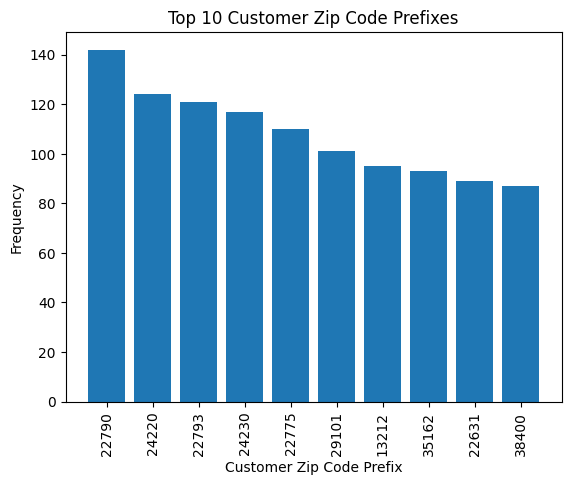

In [ ]:
# Mengambil 10 data terbanyak zip code prefix
top_10_values = dict_df['cust']['zip_code'].value_counts().head(10)

# Membuat chart bar
plt.bar(top_10_values.index.astype(str), top_10_values.values)

# Mengatur judul dan memutar 90 derajat
plt.xlabel('Customer Zip Code Prefix')
plt.ylabel('Frequency')
plt.title('Top 10 Customer Zip Code Prefixes')
plt.xticks(rotation=90)

plt.show()

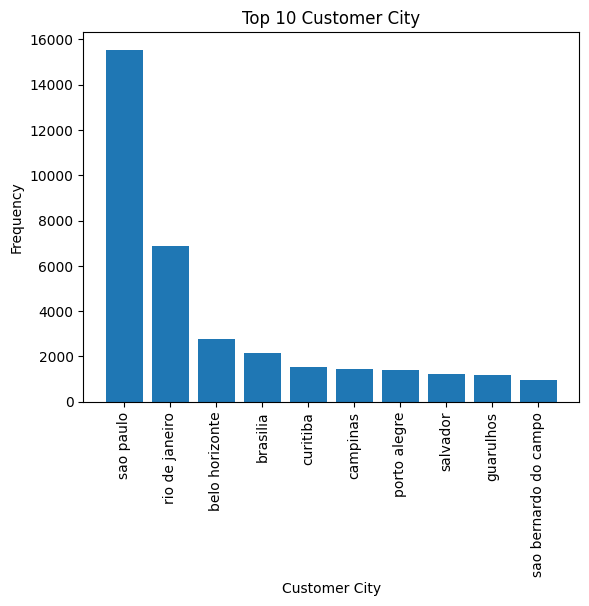

In [ ]:
# Mengambil 10 data terbanyak city
top_10_values = dict_df['cust']['customer_city'].value_counts().head(10)

# Membuat chart bar
plt.bar(top_10_values.index.astype(str), top_10_values.values)

# Mengatur judul dan memutar 90 derajat
plt.xlabel('Customer City')
plt.ylabel('Frequency')
plt.title('Top 10 Customer City')
plt.xticks(rotation=90)

plt.show()

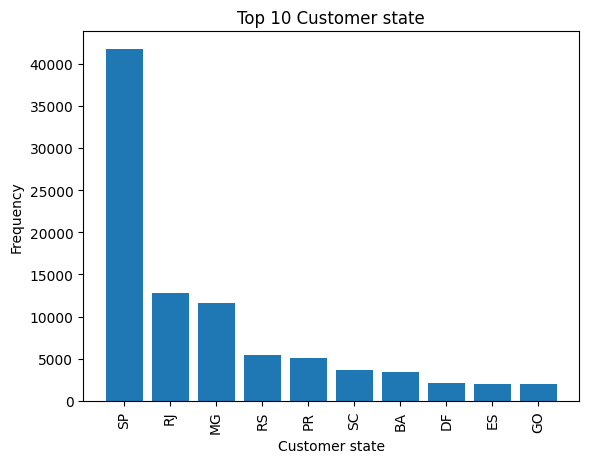

In [ ]:
# Mengambil 10 data terbanyak state
top_10_values = dict_df['cust']['customer_state'].value_counts().head(10)

# Membuat chart bar
plt.bar(top_10_values.index.astype(str), top_10_values.values)

# Mengatur judul dan memutar 90 derajat
plt.xlabel('Customer state')
plt.ylabel('Frequency')
plt.title('Top 10 Customer state')
plt.xticks(rotation=90)

plt.show()

### Explore Data Geo

In [ ]:
dict_df['geo']

,zip_code,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [ ]:
def plot_brazil_map(data):
    brazil_map = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), format='jpg')

    fig, ax = plt.subplots(figsize=(10, 10))

    # Menghitung frekuensi kemunculan setiap state
    state_counts = data['geolocation_state'].value_counts()

    # Mengambil state dengan jumlah terbanyak
    states_ordered = state_counts.index

    # Menggunakan peta warna dari merah ke kuning (warna hangat)
    colors = plt.cm.RdYlBu([i/float(len(states_ordered)-1) for i in range(len(states_ordered))])

    for state, color in zip(states_ordered, colors):
        state_data = data[data['geolocation_state'] == state]
        ax.scatter(state_data['geolocation_lng'], state_data['geolocation_lat'], alpha=0.7, s=20, c=[color], label=state)

    # Menampilkan peta Brasil sebagai background
    ax.imshow(brazil_map, extent=[-73.98283055, -33.75116944, -33.8, 5.4])

    # Menyembunyikan sumbu x dan y
    ax.axis('off')

    # Menambahkan legenda
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

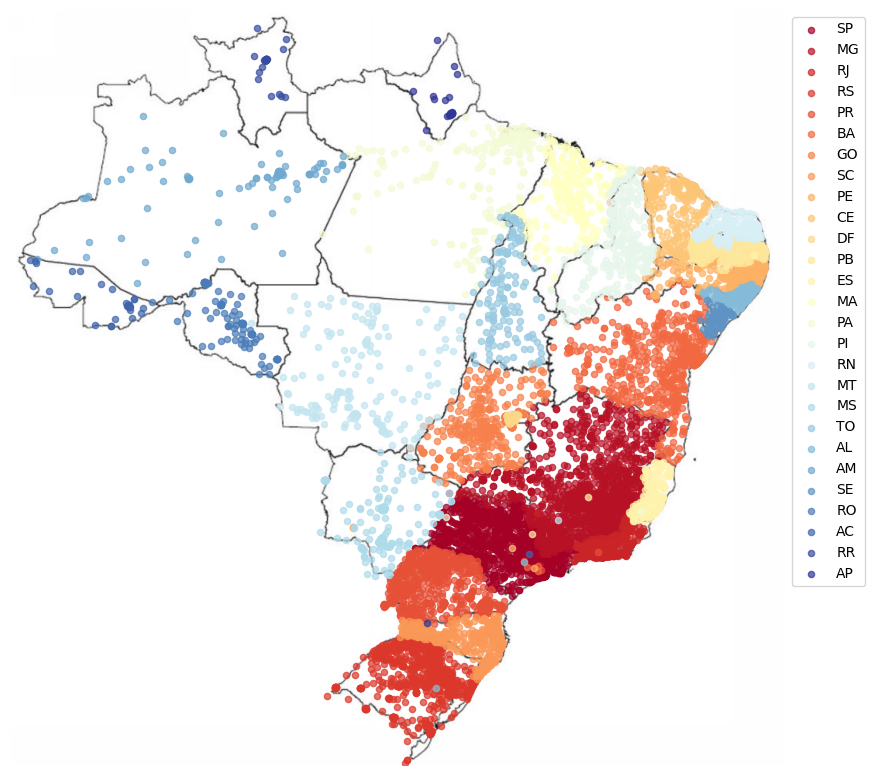

In [ ]:
# Panggil fungsi dengan data geolokasi Anda
plot_brazil_map(dict_df['geo'])

### Explore Data Order Items

In [ ]:
dict_df['order_items']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
order_items = pd.merge(dict_df['order_items'], dict_df['products'], on='product_id', how='left')

order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
98662,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
98663,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
98664,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
order_item_product = order_items[['order_item_id', 'product_category_name', 'price']]
order_item_product.head()

,order_item_id,product_category_name,price
0,1,cool_stuff,58.90
1,1,pet_shop,239.90
2,1,furniture_decor,199.00
3,1,perfumery,12.99
4,1,garden_tools,199.90


In [ ]:
# Menghitung jumlah order_item_id untuk setiap produk
top_products = order_item_product.groupby('product_category_name')['order_item_id'].sum().reset_index()

# Mengurutkan berdasarkan jumlah order_item_id secara menurun
top_products = top_products.sort_values(by='order_item_id', ascending=False)

# Menampilkan 10 produk terlaris
top_10_products = top_products.head(10)

top_10_products

,product_category_name,order_item_id
7,bed_bath_table,11136
43,health_beauty,9677
65,sports_leisure,8650
39,furniture_decor,8297
15,computers_accessories,7832
49,housewares,6962
70,watches_gifts,5995
68,telephony,4556
42,garden_tools,4335
5,auto,4218


<function matplotlib.pyplot.show(close=None, block=None)>

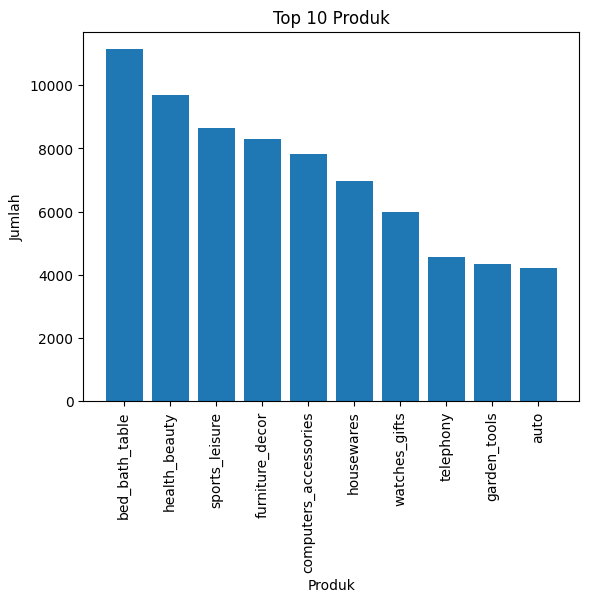

In [ ]:
plt.bar(top_10_products.product_category_name, top_10_products.order_item_id)

plt.xlabel('Produk')
plt.ylabel('Jumlah')
plt.title('Top 10 Produk')
plt.xticks(rotation=90)

plt.show

In [ ]:
# Menghitung jumlah order_item_id untuk setiap produk
top_product_revenue = order_item_product.groupby('product_category_name')['price'].sum().reset_index()

# Mengurutkan berdasarkan jumlah order_item_id secara menurun
top_product_revenue = top_product_revenue.sort_values(by='price', ascending=False)

# Menampilkan 10 produk terlaris
top_10_product_revenue = top_product_revenue.head(10)

top_10_product_revenue

,product_category_name,price
43,health_beauty,1191185.29
70,watches_gifts,1169054.98
65,sports_leisure,911934.92
7,bed_bath_table,896211.94
15,computers_accessories,778915.94
20,cool_stuff,614593.77
39,furniture_decor,599488.13
49,housewares,560006.93
5,auto,549925.58
69,toys,465174.56


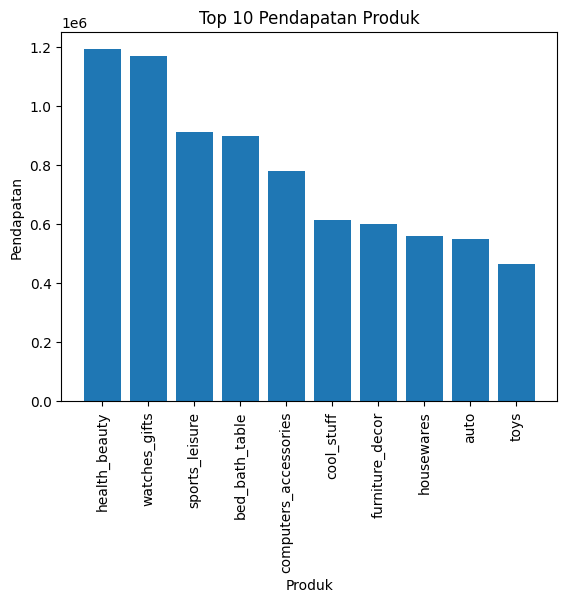

In [ ]:
plt.bar(top_10_product_revenue.product_category_name, top_10_product_revenue.price)

plt.xlabel('Produk')
plt.ylabel('Pendapatan')
plt.title('Top 10 Pendapatan Produk')
plt.xticks(rotation=90)

plt.show()

### Explore Data Order Reviews

In [ ]:
dict_df['order_reviews']

,review_id,order_id,review_score,comment_status
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Yes
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Yes
...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,Yes
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No


mengeksplore distribusi komen review

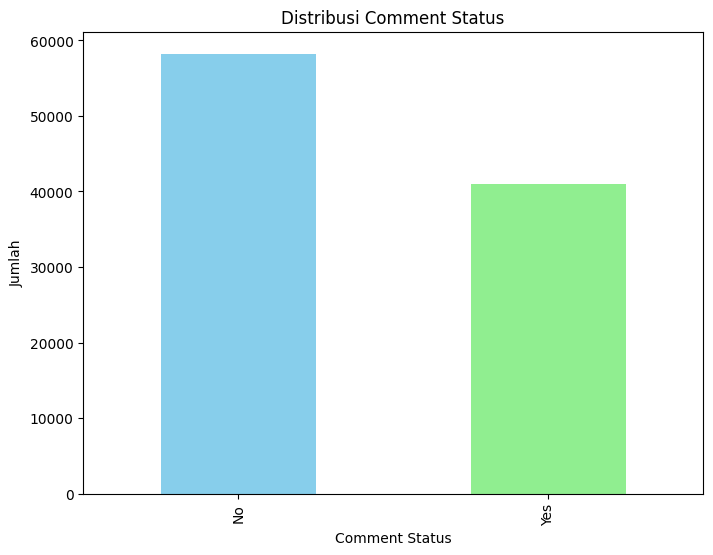

In [ ]:
# Visualisasi distribusi comment status dengan histogram
plt.figure(figsize=(8, 6))
dict_df['order_reviews']['comment_status'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribusi Comment Status')
plt.xlabel('Comment Status')
plt.ylabel('Jumlah')
plt.show()

Eksplore histogram review score

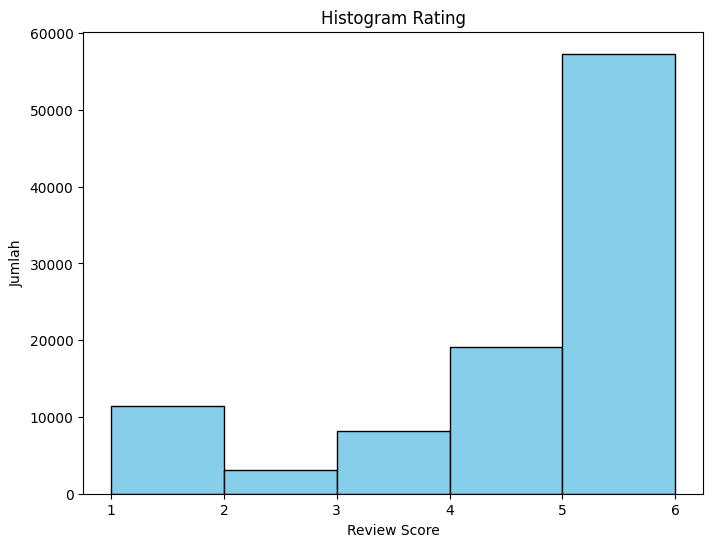

In [ ]:
# Visualisasi histogram dari kolom 'review_score'
plt.figure(figsize=(8, 6))
plt.hist(dict_df['order_reviews']['review_score'], bins=[1, 2, 3, 4, 5, 6], color='skyblue', edgecolor='black')  # Sesuaikan batas bin sesuai skala rating
plt.title('Histogram Rating')
plt.xlabel('Review Score')
plt.ylabel('Jumlah')
plt.show()

### Explore Data Orders

In [ ]:
dict_df['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 16:21:47,2017-10-04 07:01:47,2017-10-07 06:37:56,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0 days 05:25:14,1 days 14:39:59,2 days 23:36:08
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-25 07:57:58,2018-07-26 11:45:30,2018-08-07 12:42:15,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,0 days 11:16:21,1 days 03:47:31,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 18:32:56,2018-08-11 02:55:10,2018-08-20 07:11:39,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0 days 09:54:07,2 days 08:22:13,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-19 04:15:47,2017-11-21 21:54:17,2017-12-01 08:43:00,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,0 days 08:47:41,2 days 17:38:30,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 07:32:32,2018-02-15 21:24:38,2018-02-17 05:38:18,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0 days 10:13:53,1 days 13:52:06,1 days 08:13:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 16:17:37,2017-03-11 08:39:30,2017-03-20 21:48:57,2017-03-28,1.0,ac35486adb7b02598c182c2ff2e05254,...,12913.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0 days 06:23:32,1 days 16:21:53,9 days 13:09:27
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 00:35:17,2018-02-09 16:40:08,2018-03-02 10:55:22,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,17602.0,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0 days 11:36:19,2 days 16:04:51,20 days 18:15:14
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 07:38:02,2017-08-29 17:01:45,2017-09-22 07:33:36,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,8290.0,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,0 days 16:51:19,1 days 09:23:43,23 days 14:31:51
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-09 07:56:51,2018-01-10 20:23:10,2018-01-25 04:45:56,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,37175.0,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,0 days 10:28:24,1 days 12:26:19,14 days 08:22:46


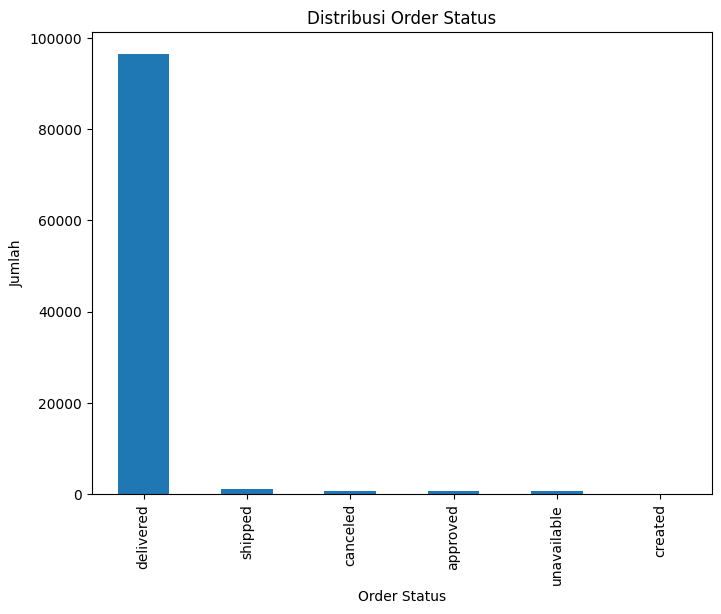

In [ ]:
# Visualisasi distribusi comment status dengan histogram
plt.figure(figsize=(8, 6))
dict_df['orders']['order_status'].value_counts().plot(kind='bar')
plt.title('Distribusi Order Status')
plt.xlabel('Order Status')
plt.ylabel('Jumlah')
plt.show()

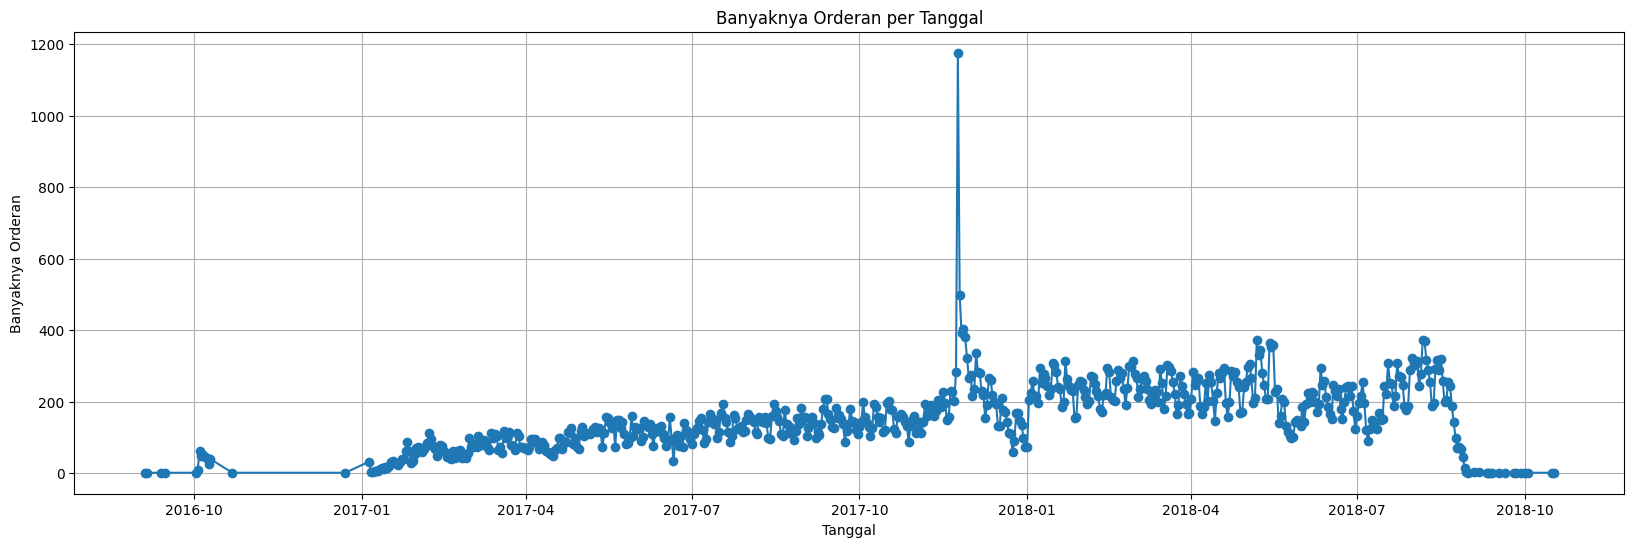

In [ ]:
# Menghitung jumlah order untuk setiap tanggal
daily_orders = dict_df['orders']['order_purchase_timestamp'].dt.date.value_counts().sort_index()

# Membuat line plot
plt.figure(figsize=(20, 6))
daily_orders.plot(kind='line', marker='o')
plt.title('Banyaknya Orderan per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Banyaknya Orderan')
plt.grid(True)
plt.show()

### Explore Seller

In [ ]:
dict_df['sellers']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
# ubah kolom seller_zip_code_prefix menjadi zip_code
dict_df['sellers'].rename(columns={'seller_zip_code_prefix': 'zip_code'}, inplace=True)

In [ ]:
geo_sellers = pd.merge(dict_df['sellers'], dict_df['geo'], on='zip_code', how='left')
geo_sellers

,seller_id,zip_code,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.382941,-46.946641,mogi-guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.910641,-43.176510,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657250,-46.610759,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.971648,-46.533618,bragança paulista,SP
...,...,...,...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.456431,-51.866369,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,-27.623801,-48.674286,palhoça,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.659845,-46.677882,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.744231,-52.328761,pelotas,RS


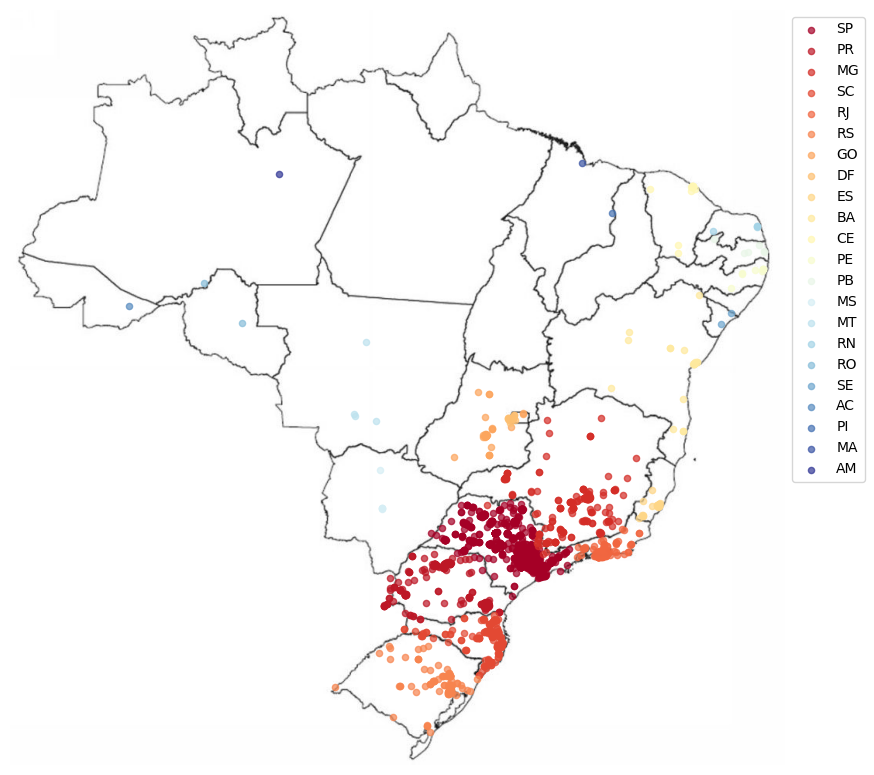

In [ ]:
# Panggil fungsi dengan data geolokasi Anda
plot_brazil_map(geo_sellers)

## Visualization & Explanatory Analysis

Gabungkan semua dataset menjadi satu

### Bagaimana tren waktu pada order purchase?

In [ ]:
order_purchase = dict_df['orders']
order_purchase

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 16:21:47,2017-10-04 07:01:47,2017-10-07 06:37:56,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0 days 05:25:14,1 days 14:39:59,2 days 23:36:08
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-25 07:57:58,2018-07-26 11:45:30,2018-08-07 12:42:15,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,0 days 11:16:21,1 days 03:47:31,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 18:32:56,2018-08-11 02:55:10,2018-08-20 07:11:39,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0 days 09:54:07,2 days 08:22:13,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-19 04:15:47,2017-11-21 21:54:17,2017-12-01 08:43:00,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,0 days 08:47:41,2 days 17:38:30,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 07:32:32,2018-02-15 21:24:38,2018-02-17 05:38:18,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0 days 10:13:53,1 days 13:52:06,1 days 08:13:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 16:17:37,2017-03-11 08:39:30,2017-03-20 21:48:57,2017-03-28,1.0,ac35486adb7b02598c182c2ff2e05254,...,12913.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0 days 06:23:32,1 days 16:21:53,9 days 13:09:27
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 00:35:17,2018-02-09 16:40:08,2018-03-02 10:55:22,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,17602.0,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0 days 11:36:19,2 days 16:04:51,20 days 18:15:14
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 07:38:02,2017-08-29 17:01:45,2017-09-22 07:33:36,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,8290.0,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,0 days 16:51:19,1 days 09:23:43,23 days 14:31:51
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-09 07:56:51,2018-01-10 20:23:10,2018-01-25 04:45:56,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,37175.0,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,0 days 10:28:24,1 days 12:26:19,14 days 08:22:46


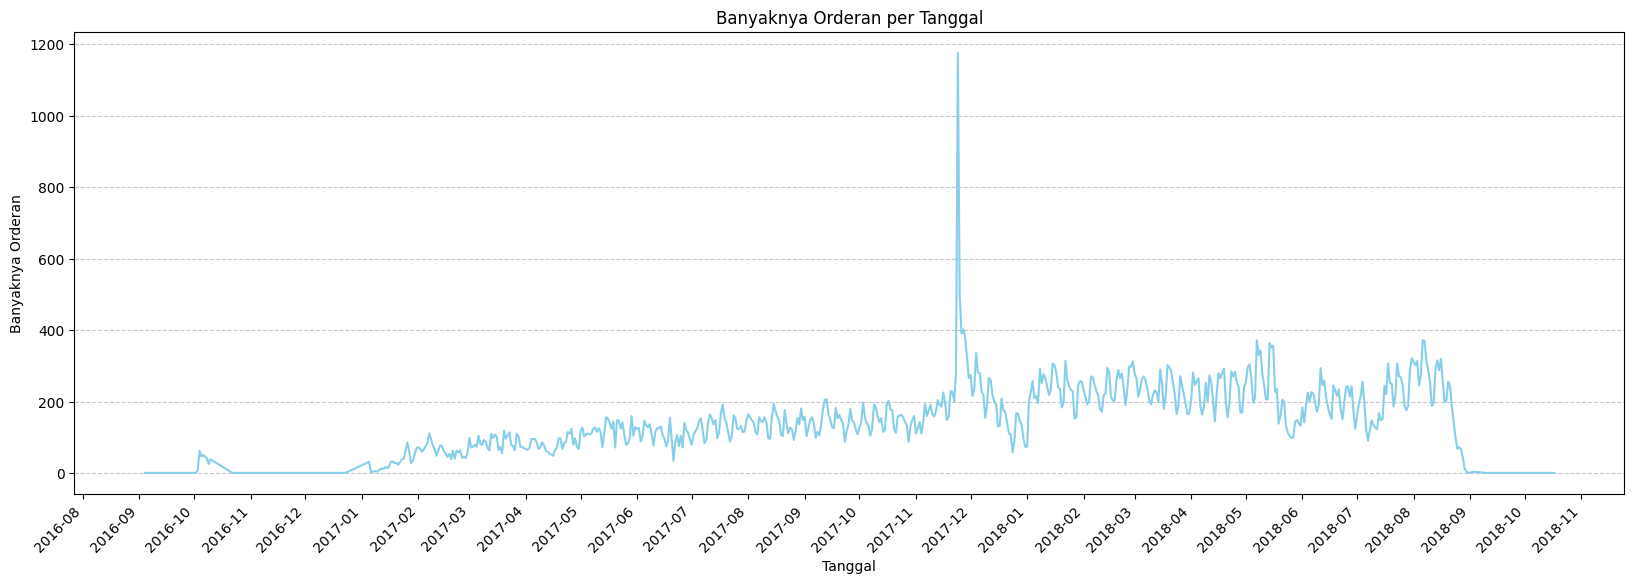

Total Order Purchase: 99441
Periode: 2016-09-04 hingga 2018-10-17
Total order: 99441
Total Revenue: 12420386.3


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Menghitung jumlah order untuk setiap tanggal
daily_orders = order_purchase['order_purchase_timestamp'].dt.date.value_counts().sort_index()

# Membuat line plot dengan Seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(x=daily_orders.index, y=daily_orders.values, color='skyblue')
plt.title('Banyaknya Orderan per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Banyaknya Orderan')

# Menentukan format dan interval untuk label tanggal
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Membuat instance dari MonthLocator

plt.xticks(rotation=45, ha='right')  # Memutar label tanggal untuk memperbaiki keterbacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f'Total Order Purchase: {daily_orders.sum()}')
print(f'Periode: {daily_orders.index[0]} hingga {daily_orders.index[-1]}')

# Menghitung jumlah total order
total_orders = len(order_purchase)
print(f'Total order: {total_orders}')

# Menghitung total revenue (total price_y)
total_revenue = order_purchase['price'].sum().round(2)
print(f'Total Revenue: {total_revenue}')

### Bagaimana persebaran wilayah pembeli?

In [ ]:
customer_distribution = pd.merge(dict_df['orders'], dict_df['geo'], on='zip_code', how='left')
customer_distribution.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
51553,10fdf269eed6d4c024dc5eeb5c7f6c37,f0807dce8ef3a4ecec555664526a28b9,delivered,2018-07-31 17:24:32,2018-07-31 18:06:53,2018-08-02 19:30:01,2018-08-08 05:55:26,2018-08-14,1.0,743c14ed5f01c78944d28320cb2cb8e2,...,39735,divinolandia de minas,MG,0 days 00:42:21,2 days 01:23:08,5 days 10:25:25,-18.800422,-42.619922,divinolandia de minas,MG
37061,dd483c08e967ecd4c5db676b84dfd1eb,d88285115e8517ca1f366dd4608a5dcc,delivered,2018-04-04 12:45:01,2018-04-05 02:37:30,2018-04-07 04:21:20,2018-04-09 23:36:52,2018-04-19,1.0,bb50f2e236e5eea0100680137654686c,...,4137,sao paulo,SP,0 days 13:52:29,2 days 01:43:50,2 days 19:15:32,-23.612082,-46.623180,sao paulo,SP
77386,1ebcf69fa275bb588691ece37ef82a30,19ad73c877b2ba253c68f626007cab97,delivered,2017-10-30 14:23:56,2017-10-31 01:41:00,2017-11-04 13:39:03,2017-11-12 09:48:52,2017-11-28,2.0,17c4bd4269902c84acc14c497f282ddb,...,64750,paulistana,PI,0 days 11:17:04,4 days 11:58:03,7 days 20:09:49,-8.132776,-41.142871,paulistana,PI


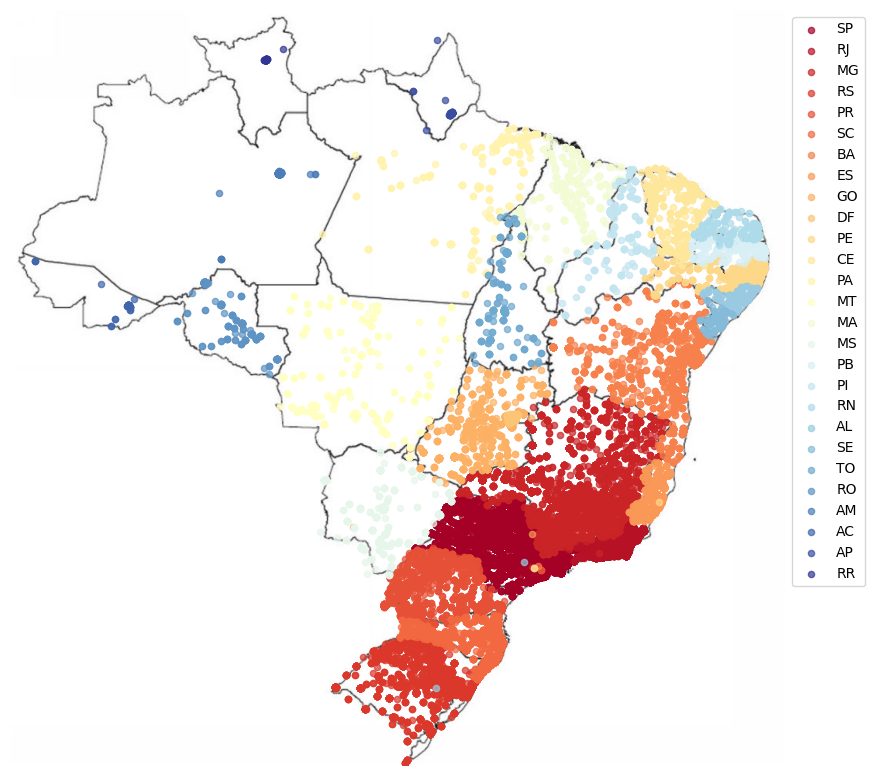

In [ ]:
plot_brazil_map(customer_distribution)

### Apa saja 10 produk paling banyak dan paling sedikit terjual?

In [ ]:
dict_df['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
# Menggabungkan data orders dengan order_items
order_items = pd.merge(dict_df['orders'], dict_df['products'][['product_id', 'product_category_name']], on='product_id', how='left')
order_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,customer_unique_id,zip_code,customer_city,customer_state,time_approve,time_delivered_carrier,time_delivered_customer,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 16:21:47,2017-10-04 07:01:47,2017-10-07 06:37:56,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0 days 05:25:14,1 days 14:39:59,2 days 23:36:08,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-25 07:57:58,2018-07-26 11:45:30,2018-08-07 12:42:15,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,0 days 11:16:21,1 days 03:47:31,12 days 00:56:45,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 18:32:56,2018-08-11 02:55:10,2018-08-20 07:11:39,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0 days 09:54:07,2 days 08:22:13,9 days 04:16:29,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-19 04:15:47,2017-11-21 21:54:17,2017-12-01 08:43:00,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,0 days 08:47:41,2 days 17:38:30,9 days 10:48:43,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 07:32:32,2018-02-15 21:24:38,2018-02-17 05:38:18,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0 days 10:13:53,1 days 13:52:06,1 days 08:13:39,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 16:17:37,2017-03-11 08:39:30,2017-03-20 21:48:57,2017-03-28,1.0,ac35486adb7b02598c182c2ff2e05254,...,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0 days 06:23:32,1 days 16:21:53,9 days 13:09:27,health_beauty
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 00:35:17,2018-02-09 16:40:08,2018-03-02 10:55:22,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0 days 11:36:19,2 days 16:04:51,20 days 18:15:14,baby
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 07:38:02,2017-08-29 17:01:45,2017-09-22 07:33:36,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,0 days 16:51:19,1 days 09:23:43,23 days 14:31:51,home_appliances_2
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-09 07:56:51,2018-01-10 20:23:10,2018-01-25 04:45:56,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,0 days 10:28:24,1 days 12:26:19,14 days 08:22:46,computers_accessories


In [ ]:
# Sortir top 10 paling banyak terjual dan paling sedikit
# Groupby berdasarkan 'product_category_name' dan menjumlahkan 'order_item_id'
result = order_items.groupby('product_category_name')['order_item_id'].sum().reset_index()

# Mengambil 10 terbanyak dan terendah
top_10_sold = result.nlargest(10, 'order_item_id')
bottom_10_sold = result.nsmallest(10, 'order_item_id')

In [ ]:
top_10_sold

,product_category_name,order_item_id
7,bed_bath_table,11136.0
43,health_beauty,9677.0
65,sports_leisure,8650.0
39,furniture_decor,8297.0
15,computers_accessories,7832.0
49,housewares,6962.0
70,watches_gifts,5995.0
68,telephony,4556.0
42,garden_tools,4335.0
5,auto,4218.0


In [ ]:
bottom_10_sold

,product_category_name,order_item_id
61,security_and_services,2.0
29,fashion_childrens_clothes,6.0
11,cds_dvds_musicals,14.0
52,la_cuisine,14.0
3,arts_and_craftmanship,24.0
35,flowers,31.0
32,fashion_sport,32.0
46,home_comfort_2,32.0
41,furniture_mattress_and_upholstery,38.0
55,music,38.0


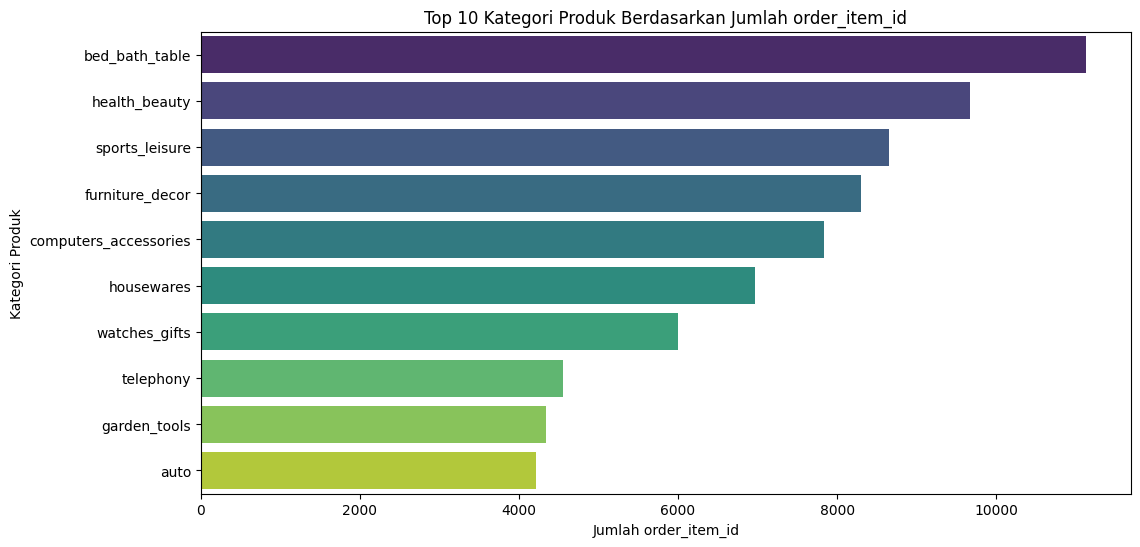

In [ ]:
# Plot untuk 10 terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(x='order_item_id', y='product_category_name', data=top_10_sold, palette='viridis')
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah order_item_id')
plt.xlabel('Jumlah order_item_id')
plt.ylabel('Kategori Produk')
plt.show()

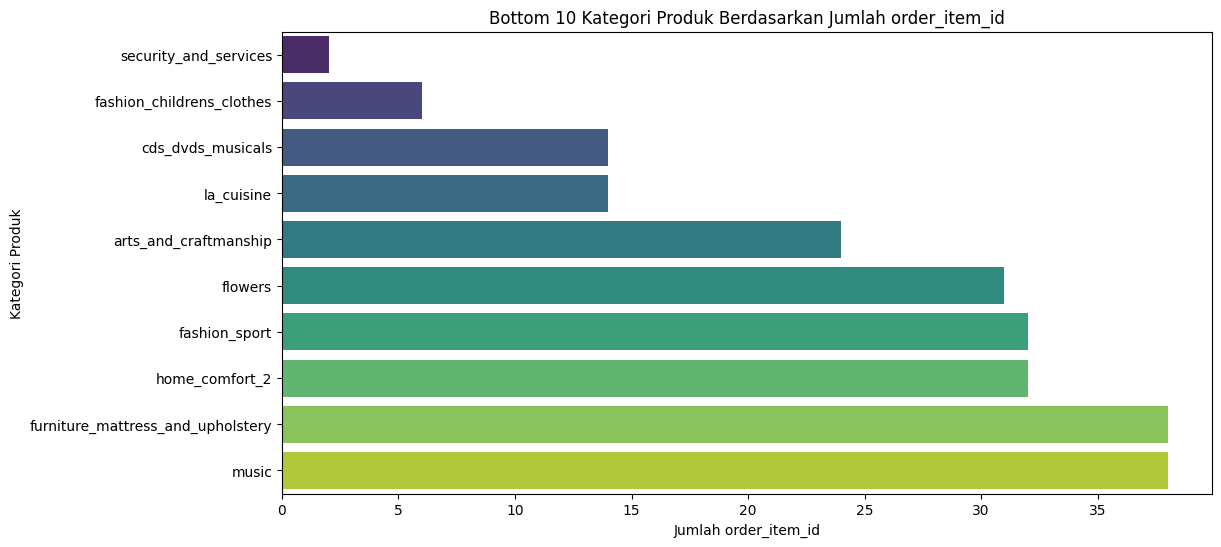

In [ ]:
# Plot untuk 10 terendah
plt.figure(figsize=(12, 6))
sns.barplot(x='order_item_id', y='product_category_name', data=bottom_10_sold, palette='viridis')
plt.title('Bottom 10 Kategori Produk Berdasarkan Jumlah order_item_id')
plt.xlabel('Jumlah order_item_id')
plt.ylabel('Kategori Produk')
plt.show()

### Bagaimana kualitas produk berdasarkan rata-rata rating score?

In [ ]:
dict_df['order_reviews'].sample(3)

,review_id,order_id,review_score,comment_status
85694,efd62a3603e7fd02edc90dd6885057fb,d8d344285c3eb8fe24478102c93f6e94,5,Yes
62024,0b03fcb5a00da21a945b108b68b4df87,71ca3bab201007339dfb592df2d185d4,5,No
54184,3d64c181d02a95c7d5d1522b513b1316,5cbc4966cc894d0b1ad64e7747264335,5,No


In [ ]:
dict_df['order_items'].sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
79828,b58d52e3a578620cf3e4cd9b2b5a0516,1,fa7e28f040bfdcfdbd93f82a31277e43,218d46b86c1881d022bce9c68a7d4b15,2017-12-11 16:31:05,40.0,28.75
79820,b58a6cafa236091ed83bec2b0ff64ec7,1,d95cb21837d0498ccfa0943b03808f79,b4a476fbd28de64b1e347abf9089366a,2017-05-15 09:35:49,52.5,9.34
7706,11756f86e163262523f75f21a3b127af,1,f8b624d4e475bb8d1bddf1b65c6a64f6,b410bdd36d5db7a65dcd42b7ead933b8,2018-05-11 02:54:15,179.0,14.51


In [ ]:
dict_df['products'].sample(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3174,b047c3de5919c05d6aa9e3ba5494b993,watches_gifts,42.0,712.0,1.0,350.0,16.0,12.0,11.0
12846,d45f43af9b205b51568f78314d3057a6,sports_leisure,49.0,1096.0,3.0,3050.0,20.0,20.0,20.0
3315,72a137b85d5a1d82cde242493f118f43,consoles_games,55.0,411.0,3.0,600.0,24.0,20.0,27.0


In [ ]:
# merge dataset untuk mengetahui rating produk
product_rating = pd.merge(dict_df['order_reviews'], dict_df['order_items'], on='order_id', how='left')
product_rating = pd.merge(product_rating, dict_df['products'], on='product_id', how='left')

product_rating

,review_id,order_id,review_score,comment_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,computers_accessories,47.0,493.0,1.0,245.0,19.0,14.0,14.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Yes,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,garden_tools,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Yes,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,sports_leisure,48.0,562.0,5.0,9850.0,105.0,35.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20,furniture_decor,56.0,623.0,1.0,7250.0,100.0,25.0,25.0
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77,toys,51.0,465.0,1.0,2363.0,23.0,27.0,19.0
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,Yes,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59,stationery,45.0,283.0,3.0,4100.0,40.0,37.0,29.0
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No,1.0,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,2018-06-26 18:15:29,50.95,15.46,sports_leisure,58.0,998.0,5.0,600.0,16.0,10.0,11.0


In [ ]:
# Menghitung rata-rata rating untuk setiap product_id
average_rating_per_product = product_rating.groupby('product_id')['review_score'].mean().round(1)

value_rating = average_rating_per_product.value_counts()
value_rating

5.0    13794
4.0     4694
1.0     2451
3.0     2384
4.5     1576
2.0      748
4.3      628
4.7      603
3.5      537
4.2      515
3.7      472
4.8      467
3.8      353
4.4      313
4.6      302
2.5      296
3.3      257
4.1      235
3.9      202
3.6      153
3.2      144
3.4      100
4.9       80
2.3       79
2.7       77
2.8       70
1.5       45
3.1       28
2.9       25
2.2       21
2.6       18
1.8       16
1.3        8
1.7        7
2.4        7
1.2        4
2.1        2
1.6        2
1.4        1
Name: review_score, dtype: int64

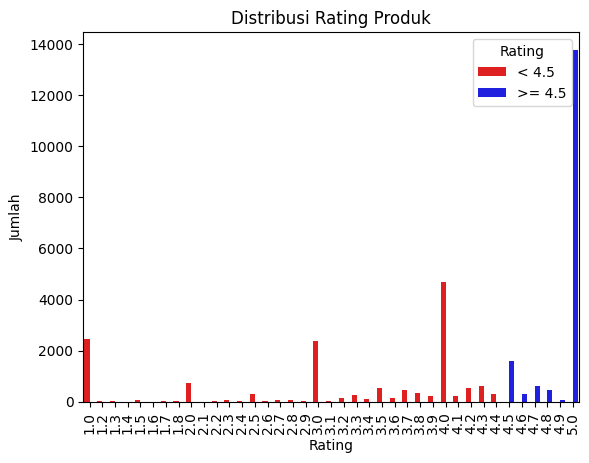

In [ ]:
# bar rating produk
sns.countplot(x=average_rating_per_product, hue=average_rating_per_product >= 4.5, palette={False: 'red', True: 'blue'})
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.legend(title='Rating', labels=['< 4.5', '>= 4.5'], loc='upper right')
plt.show()

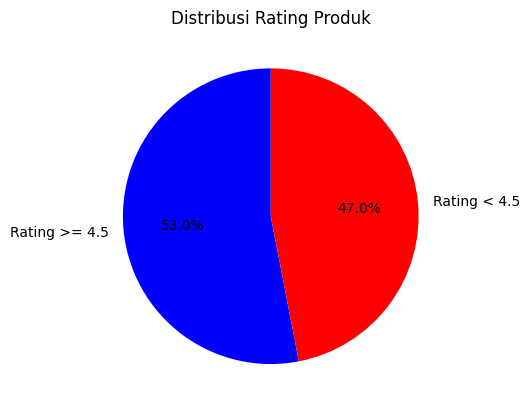

In [ ]:
# Membuat dua kategori: Rating > 4.5 dan Rating <= 4.5
high_ratings = average_rating_per_product[average_rating_per_product >= 4.5]
low_ratings = average_rating_per_product[average_rating_per_product < 4.5]

# Menghitung jumlah produk di setiap kategori
high_ratings_count = len(high_ratings)
low_ratings_count = len(low_ratings)

# Membuat data untuk pie chart
ratings_data = [high_ratings_count, low_ratings_count]
labels = ['Rating >= 4.5', 'Rating < 4.5']

# Membuat pie chart
plt.pie(ratings_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red']
)
plt.title('Distribusi Rating Produk')
plt.show()

## Conclusion

### Bagaimana tren waktu pada order purchase?

Pada plot diatass digambarkan tren time series dari data pembelian selama periode 4 September 2016 hingga 17 Oktober 2018. Dengan total order purchase mencapai 99,441, dapat dilihat bagaimana aktivitas pembelian mengalami pertumbuhan perlahan. Terdapat lonjakan pembelian pada waktu tertentu dengan purchase hampir 1200 pada bulan desember. Namun, terdapat penurunan yang signifikan pada bulan Oktober.

Dengan hasil itu dapat digali lagi terkait penyebab naiknya purchase, agar bisa diterapkan untuk hari-hari selanjutnya.

Dan untuk penurunan yang signifikan di bulan oktober juga harus diselidiki penyebabnya, untuk dilakukan evaluasi dan agar dapat diperbaiki supaya order purchase tidak turun di kemudian hari.

### Bagaimana persebaran wilayah pembeli?

Dari plot map distribusi customer yang melakukan order, ditampilkan bahwa semakin merah state memiliki jumlah customer terbanyak dan semakin biru maka jumlah customer semakin sedikit.

Dalam kondisi state yang sudah banyak customer, dapat dilakukan strategi promosi baru untuk mengundang customer melakukan repeat order dan tetap memakai platform ecommerce ini

Sedangkan untuk state dengan customer yang berwarna biru, perlu diselidiki terkait penyebab kenapa sedikit. Apkah belum terjangkau pemasaraan ecommercenya, atau di state tersebut terdapat kompetitor yang lebih dulu menguasai.

### Apa saja 10 produk paling banyak dan paling sedikit terjual?

Dari analisis kategori produk terlaris, dapat disimpulkan bahwa produk-produk di sektor kesehatan dan kecantikan, terutama dalam kategori Bed Bath & Table dan Health & Beauty, memperoleh kepopuleran yang signifikan. Trend positif juga terlihat pada kategori-kategori seperti Sports & Leisure, Furniture Decor, dan Computers & Accessories, menunjukkan preferensi pelanggan terhadap produk-produk dalam kategori-kategori ini.

Di sisi lain, analisis kategori produk terendah mengindikasikan bahwa beberapa kategori, seperti Security & Services dan Fashion Children's Clothes, memiliki performa yang mengecewakan. Sebagai solusi potensial, bisnis dapat mempertimbangkan strategi pemasaran yang lebih agresif atau penyesuaian penawaran untuk meningkatkan daya tarik dan penjualan produk dalam kategori-kategori tersebut.

### Bagaimana kualitas produk berdasarkan rata-rata rating score?

Dari plot bar produk rating didapatkan lebih dari 13000 produk mendapatkan rating score 5, namun masih banyak juga produk yang mendapatkan rating score yang rendah, bahkan sampai dibawah 2.

Jika dipetakan menjadi 2 yaitu high rating >= 4.5 dan low rating < 4.5. maka 53% produk mendapatkan high rating dan 47% produk mendapatkan low rating.

Perlu diperhatikan untuk produk dengan low rating, hal tersebut akan berdampak buruk terhadap platform dan pengaruh pengalaman yang buruk terhadap kepercayaan pelanggan dalam pembelian produk.

## Download Dataset

In [ ]:
order_purchase.to_csv('drive/MyDrive/Dicoding IDCamp 2023/dataset_order_purchase.csv', index=False)
customer_distribution.to_csv('drive/MyDrive/Dicoding IDCamp 2023/dataset_customer_distribution.csv', index=False)
order_items.to_csv('drive/MyDrive/Dicoding IDCamp 2023/dataset_order_items.csv', index=False)
product_rating.to_csv('drive/MyDrive/Dicoding IDCamp 2023/dataset_product_rating.csv', index=False)